<a href="https://colab.research.google.com/github/pragadeesh200301/pragadeesh200301.github.io/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/chandrikadeb7/Face-Mask-Detection.git

Cloning into 'Face-Mask-Detection'...
remote: Enumerating objects: 4590, done.
remote: Total 4590 (delta 0), reused 0 (delta 0), pack-reused 4590
Receiving objects: 100% (4590/4590), 186.72 MiB | 21.07 MiB/s, done.
Resolving deltas: 100% (271/271), done.
Updating files: 100% (4155/4155), done.


In [ ]:
!ls Face-Mask-Detection/dataset

with_mask  without_mask


In [ ]:
!ls Face-Mask-Detection/dataset/with_mask

'0_0_≈˙◊¢ 2020-02-23 132115.png'		     225.jpg
'0_0_≈˙◊¢ 2020-02-23 132400.png'		     226.jpg
'0_0_≈˙◊¢ 2020-02-24 171804.png'		     227.jpg
'0_0_≈˙◊¢ 2020-02-24 172039.png'		     228.jpg
'0_0_≈˙◊¢ 2020-02-24 202509.png'		     229.jpg
'0_0_≈˙◊¢ 2020-02-24 205216.png'		     22.jpg
'0_0_≈˙◊¢ 2020-02-24 215234.png'		     230.jpg
'0_0_≈˙◊¢ 2020-02-24 215615.png'		     231.jpg
'0_0_≈˙◊¢ 2020-02-24 220536.png'		     232.jpg
'0_0_≈˙◊¢ 2020-02-24 222124.png'		     233.jpg
'0_0_≈˙◊¢ 2020-02-24 224833.png'		     2345.png
'0_0_≈˙◊¢ 2020-02-24 225329.png'		     234.jpg
'0_0_≈˙◊¢ 2020-02-24 225427.png'		     235.jpg
'0_0_≈˙◊¢ 2020-02-25 150422.png'		     236.jpg
'0_0_≈˙◊¢ 2020-02-25 150847.png'		     237.jpg
'0_0_≈˙◊¢ 2020-02-25 150921.png'		     238.jpg
'0_0_≈˙◊¢ 2020-02-25 185823.png'		     2398.png
'0_0_≈˙◊¢ 2020-02-25 190026.png'		     239.jpg
 0_0_0066ichXly3gbb630i4w6j30u00tzjtk.jpg	     240.jpg
 0_0_0066ntrkgw1f8lreziaalj30iw0cl40h.jpg	     241.jpg
 0_0_006ajtxFly1g5eb2v2jmcj30iy0npt9w.jpg	 

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("Face-Mask-Detection/dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Face-Mask-Detection/dataset'.
There are 0 directories and 1930 images in 'Face-Mask-Detection/dataset/without_mask'.
There are 0 directories and 2165 images in 'Face-Mask-Detection/dataset/with_mask'.


In [ ]:
with_mask_train = os.listdir("Face-Mask-Detection/dataset/with_mask")[:1500]
print(len(with_mask_train))
without_mask_train = os.listdir("Face-Mask-Detection/dataset/without_mask")[:1500]
print(len(without_mask_train))

1500
1500


In [ ]:
with_mask_test = os.listdir("Face-Mask-Detection/dataset/with_mask")[1500:]
print(len(with_mask_test))
without_mask_test = os.listdir("Face-Mask-Detection/dataset/without_mask")[1500:]
print(len(without_mask_test))

665
430


In [ ]:
train = with_mask_train + without_mask_train
test = with_mask_test + without_mask_test

In [ ]:
#Get the classnames programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("Face-Mask-Detection/dataset")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['with_mask' 'without_mask']


In [ ]:
#Visuaize image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  #Get a random image path
  random_image_path = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image_path[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")

  return img


Image shape: (79, 66, 3)


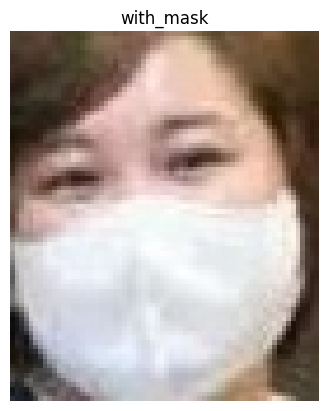

In [ ]:
trial = view_random_image("Face-Mask-Detection/dataset/", "with_mask")

Image shape: (428, 320, 3)


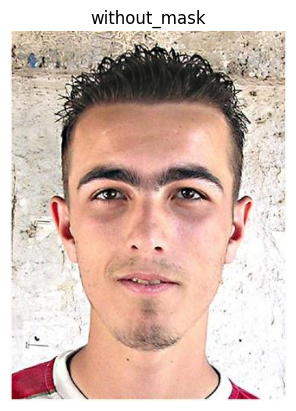

In [ ]:
trial = view_random_image("Face-Mask-Detection/dataset/", "without_mask")

In [ ]:
import tensorflow as tf
tf.constant(trial)

<tf.Tensor: shape=(428, 320, 3), dtype=uint8, numpy=
array([[[255, 255, 239],
        [254, 246, 227],
        [229, 214, 193],
        ...,
        [209, 201, 190],
        [252, 247, 241],
        [255, 255, 251]],

       [[255, 255, 239],
        [248, 239, 222],
        [218, 203, 182],
        ...,
        [208, 200, 189],
        [253, 248, 242],
        [252, 251, 247]],

       [[255, 251, 237],
        [241, 232, 215],
        [208, 193, 172],
        ...,
        [220, 212, 201],
        [255, 254, 248],
        [252, 251, 247]],

       ...,

       [[249, 250, 244],
        [230, 212, 208],
        [101,  46,  51],
        ...,
        [253, 253, 253],
        [254, 254, 254],
        [255, 255, 255]],

       [[235, 255, 251],
        [249, 255, 250],
        [237, 211, 210],
        ...,
        [253, 253, 253],
        [255, 255, 255],
        [255, 255, 255]],

       [[224, 255, 251],
        [233, 255, 244],
        [255, 252, 248],
        ...,
        [254, 254, 25

Neural Networks can only handle scaled values tensors of images

In [ ]:
trial/255.

array([[[1.        , 1.        , 0.9372549 ],
        [0.99607843, 0.96470588, 0.89019608],
        [0.89803922, 0.83921569, 0.75686275],
        ...,
        [0.81960784, 0.78823529, 0.74509804],
        [0.98823529, 0.96862745, 0.94509804],
        [1.        , 1.        , 0.98431373]],

       [[1.        , 1.        , 0.9372549 ],
        [0.97254902, 0.9372549 , 0.87058824],
        [0.85490196, 0.79607843, 0.71372549],
        ...,
        [0.81568627, 0.78431373, 0.74117647],
        [0.99215686, 0.97254902, 0.94901961],
        [0.98823529, 0.98431373, 0.96862745]],

       [[1.        , 0.98431373, 0.92941176],
        [0.94509804, 0.90980392, 0.84313725],
        [0.81568627, 0.75686275, 0.6745098 ],
        ...,
        [0.8627451 , 0.83137255, 0.78823529],
        [1.        , 0.99607843, 0.97254902],
        [0.98823529, 0.98431373, 0.96862745]],

       ...,

       [[0.97647059, 0.98039216, 0.95686275],
        [0.90196078, 0.83137255, 0.81568627],
        [0.39607843, 0

In [ ]:
import os
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
base_dir = "Face-Mask-Detection/dataset"
with_mask_dir = os.path.join(base_dir, "with_mask")
without_mask_dir = os.path.join(base_dir, "without_mask")

# Define paths for train and test directories
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

train_with_mask_dir = os.path.join(train_dir, "with_mask")
train_without_mask_dir = os.path.join(train_dir, "without_mask")
test_with_mask_dir = os.path.join(test_dir, "with_mask")
test_without_mask_dir = os.path.join(test_dir, "without_mask")

# Create train and test directories
os.makedirs(train_with_mask_dir, exist_ok=True)
os.makedirs(train_without_mask_dir, exist_ok=True)
os.makedirs(test_with_mask_dir, exist_ok=True)
os.makedirs(test_without_mask_dir, exist_ok=True)

# Get all image files
with_mask_files = os.listdir(with_mask_dir)
without_mask_files = os.listdir(without_mask_dir)

# Split the images
train_with_mask_files = with_mask_files[:1500]
test_with_mask_files = with_mask_files[1500:]

train_without_mask_files = without_mask_files[:1500]
test_without_mask_files = without_mask_files[1500:]

# Copy files to respective directories
for file in train_with_mask_files:
    copyfile(os.path.join(with_mask_dir, file), os.path.join(train_with_mask_dir, file))

for file in test_with_mask_files:
    copyfile(os.path.join(with_mask_dir, file), os.path.join(test_with_mask_dir, file))

for file in train_without_mask_files:
    copyfile(os.path.join(without_mask_dir, file), os.path.join(train_without_mask_dir, file))

for file in test_without_mask_files:
    copyfile(os.path.join(without_mask_dir, file), os.path.join(test_without_mask_dir, file))

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load and preprocess the images
train_data = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),  # Change the target size based on your model's input size
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

test_data = datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),  # Change the target size based on your model's input size
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=42
)

# Verify the shapes of the batches
for train_batch, test_batch in zip(train_data, test_data):
    print(train_batch[0].shape)  # Shape of the image tensor batch
    print(train_batch[1].shape)  # Shape of the labels
    print(test_batch[0].shape)
    print(test_batch[1].shape)
    break  # We just need to verify one batch


Found 2998 images belonging to 2 classes.
Found 1094 images belonging to 2 classes.
(32, 224, 224, 3)
(32,)
(32, 224, 224, 3)
(32,)


In [ ]:
len(test_data)

35

In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(filters = 10, kernel_size =3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [ ]:
model_1.compile(
    loss = "binary_crossentropy",
    metrics = ["accuracy"],
    optimizer = tf.keras.optimizers.Adam()
)

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
94/94 [==============================] - 21s 177ms/step - loss: 0.3577 - accuracy: 0.8516 - val_loss: 0.2577 - val_accuracy: 0.9068
Epoch 2/5
94/94 [==============================] - 14s 147ms/step - loss: 0.2333 - accuracy: 0.9139 - val_loss: 0.2551 - val_accuracy: 0.8976
Epoch 3/5
94/94 [==============================] - 13s 138ms/step - loss: 0.1925 - accuracy: 0.9330 - val_loss: 0.1865 - val_accuracy: 0.9214
Epoch 4/5
94/94 [==============================] - 13s 139ms/step - loss: 0.1794 - accuracy: 0.9376 - val_loss: 0.1905 - val_accuracy: 0.9278
Epoch 5/5
94/94 [==============================] - 13s 133ms/step - loss: 0.1545 - accuracy: 0.9496 - val_loss: 0.1999 - val_accuracy: 0.9324
